In [3]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import math
import numpy as np

In [5]:
file = 'sM(s)_vs_s.txt'
folder = os.getcwd()
df = pd.read_csv(os.path.join(folder, file), sep = '\s+')
df

,S(A^-1),sM(s)
0,0.020142,252.006622
1,0.060427,245.186386
2,0.100712,238.519073
3,0.140997,232.034821
4,0.181282,225.763748
...,...,...
195,7.875704,5.202905
196,7.915989,3.974158
197,7.956274,2.719069
198,7.996559,1.432609


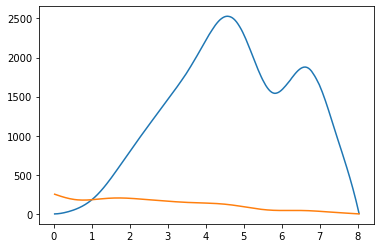

In [12]:
s = df['S(A^-1)'].to_numpy()
sMs = df['sM(s)'].to_numpy()
sMs2 = np.multiply(sMs,s**2)
plt.plot(s, sMs2)
plt.plot(s,sMs)

In [7]:
def function_inside(s,sMs,r):
    k = 0.02
    s2 = np.multiply(s,s)
    sinfun = np.sin(np.multiply(s,r))
    expfun = np.exp(np.multiply(-k,s2))
    out = sMs*np.multiply(sinfun,expfun)
    return out

In [9]:
from sklearn import metrics

r = np.linspace(0,8, 100)
mrdf = []


for ri in r:
    y = function_inside(s, sMs, ri)
    area = metrics.auc(s,y)
    mrdf.append(area)

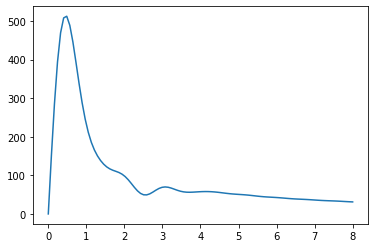

In [10]:
plt.plot(r, mrdf)